In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras as keras

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt

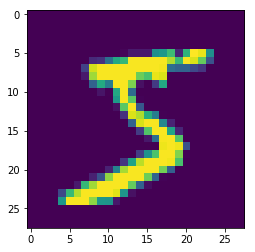

5


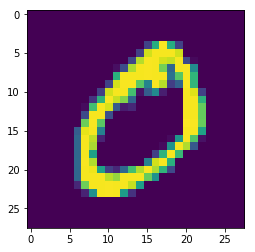

0


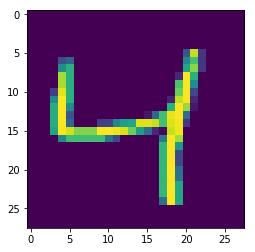

4


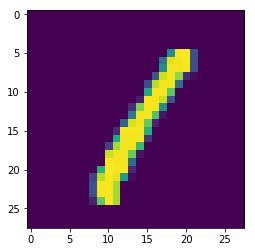

1


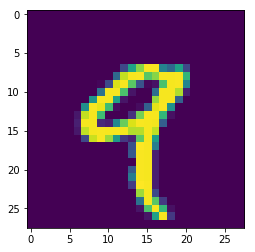

9


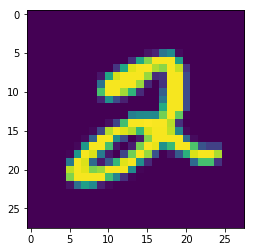

2


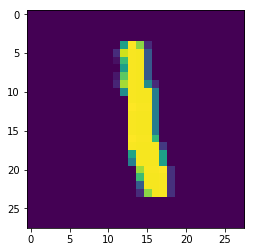

1


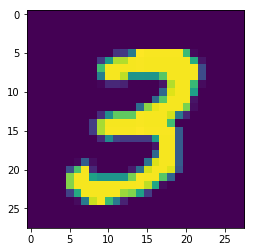

3


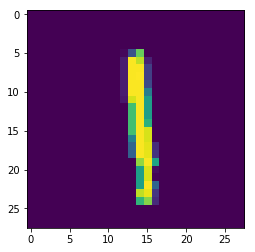

1


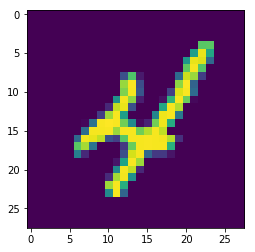

4


In [5]:


for i in range (10):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [6]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [8]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
          
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@training/Adadelta/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adadelta/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1/kernel/read)]]
	 [[{{node metrics/acc/Mean/_187}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1666_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
plt.imshow(x_test[10].reshape(28,28))
plt.show()

In [ ]:
pred = model.predict(x_test[10].reshape(1,28,28,1))

In [ ]:
print(pred)
print(np.argmax( pred ))

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
from PIL import Image
import numpy as np

img = Image.open('7.png').convert("L")

img = np.resize(img, (28, 28))
plt.imshow(img)

img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = model.predict(im2arr)
print(np.argmax(y_pred))